<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 - Web APIs & NLP

## Problem Statement

Chat GPT (Chat Generative Pre-trained Transformer) was released in November 2023. Chat GPT is being used for translation, conversational AI,  coding, and education. Chat GPT seems to be useful. As a data scientist, we wish to explore the difference between ChatGPT’s response and humans' response. To be able to do that we need a model that can recognize whether the text is AI response or human response. The purpose of this project is to build a classification model by collecting all of the text written by both human and AI on the responses to the same question using logistic regression, Naive Bayes, and KNN so that we can train a model to learn how to figure out whether text is human written or ai written.


### Contents:
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

### Dataset

* [`project3_answer.csv`]('../data/project3_answer.csv'): Human answer and AI answer

**Brief description of the contents for each dataset.**



## Preprocessing and Modeling

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score, f1_score

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('../data/project3_answer.csv')

In [3]:
df.head()

,Unnamed: 0,answer,result
0,0,It's all I have,1
1,1,3 months minimum and I'd watch it\n\nThanks fo...,1
2,2,"“I recognize the council has made a decision, ...",1
3,3,what about subs that crosspost from other subs...,1
4,4,Found this after accidentally losing my place ...,1


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,answer,result
0,It's all I have,1
1,3 months minimum and I'd watch it\n\nThanks fo...,1
2,"“I recognize the council has made a decision, ...",1
3,what about subs that crosspost from other subs...,1
4,Found this after accidentally losing my place ...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   answer  10834 non-null  object
 1   result  10834 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 169.4+ KB


In [6]:
df.isnull().sum()

answer    0
result    0
dtype: int64

In [7]:
df['result'].value_counts(normalize=True)

1    0.5
0    0.5
Name: result, dtype: float64

In [ ]:
# organize document by using RegexpTokenizer and WordNetLemmatizer

In [ ]:
#tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
#for document in df['answer']:
    #doc = tokenizer.tokenize(document.lower())

In [35]:
#lemmatizer = WordNetLemmatizer()

In [37]:
#tokens_lem = [lemmatizer.lemmatize(i) for i in df['answer']]

In [ ]:
# use this function to create a result dataframe for all the model (from lesson 2.14)

In [22]:
def evaluation(X_test, y_test, preds, model):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    
    recall = recall_score(y_test, preds, pos_label = 1)
    prec = precision_score(y_test, preds, pos_label = 1)
    f1 = f1_score(y_test, preds, pos_label = 1)

    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

    return {
        'recall': recall,
        'precision': prec,
        'f1_score': f1
    }

In [ ]:
# set up train test split

In [8]:
X = df['answer']
y = df['result']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)

In [28]:
cvec = CountVectorizer()

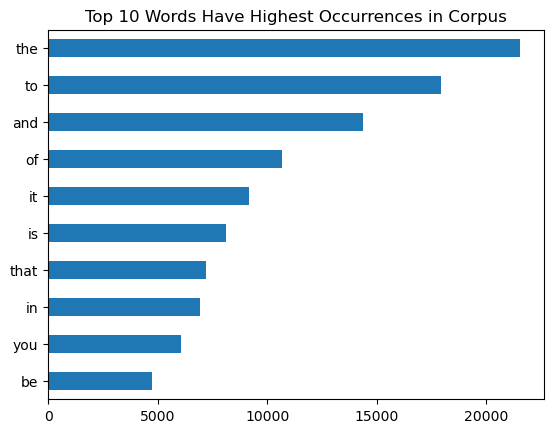

In [32]:
X_train_df = pd.DataFrame(cvec.fit_transform(X_train).todense(), 
                          columns=cvec.get_feature_names_out())

# plot top occuring words
X_train_df.sum().sort_values().tail(10).plot(kind = 'barh')
plt.title('Top 10 Words Have Highest Occurrences in Corpus');

In [25]:
tvec= TfidfVectorizer()

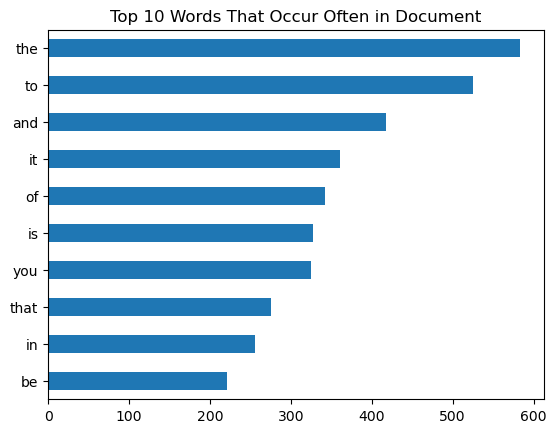

In [34]:
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names_out())

# plot top occuring words
X_train_df.sum().sort_values().tail(10).plot(kind='barh')
plt.title('Top 10 Words That Occur Often in Document');

In [11]:
y_train.value_counts(normalize=True)

1    0.500062
0    0.499938
Name: result, dtype: float64

#### Model 1: CountVectorizer & BernoulliNB

In [12]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('bnb', BernoulliNB())
])

In [13]:
nltk_stop = stopwords.words('english')

In [14]:
pipe_params = {
    'cvec__max_features' : [2500, 5000],
    'cvec__min_df' : [3, 5],
    'cvec__max_df' : [0.9, 0.95],
    'cvec__ngram_range' : [(1,1), (1, 2)],
    'cvec__stop_words' : ['english', None, nltk_stop]
}

In [15]:
gs = GridSearchCV(pipe, pipe_params, cv=5)

In [16]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('bnb', BernoulliNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2500, 5000],
                         'cvec__min_df': [3, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]]})

In [64]:
gs.best_score_

0.8820923076923076

In [65]:
gs.score(X_train,y_train)

0.8944

In [19]:
gs.score(X_test,y_test)

0.8815060908084164

In [20]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [57]:
preds1 = gs.predict(X_test)
preds1[:5]

array([0, 0, 0, 1, 1])

In [58]:
scores = []

recall: 0.9630723781388478
precision: 0.827936507936508
f1 score: 0.890406282007511


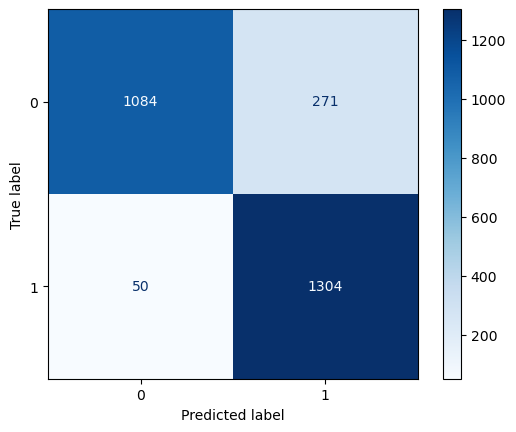

In [59]:
scores.append(evaluation(X_test, y_test, preds1, gs))

In [ ]:
#result ????

#### Model 2: CountVectorizer & LogisticRegression 

In [60]:
pipe_2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logr', LogisticRegression(max_iter=1000))
])

In [61]:
gs_2 = GridSearchCV(pipe_2, pipe_params, cv=5)
gs_2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logr',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2500, 5000],
                         'cvec__min_df': [3, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]]})

In [16]:
gs_2.score(X_train,y_train)

0.9827901867447821

In [17]:
gs_2.score(X_test,y_test)

0.9128524350054925

In [18]:
gs_2.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [62]:
preds2 = gs_2.predict(X_test)

recall: 0.9246676514032496
precision: 0.8962061560486757
f1 score: 0.9102144674663758


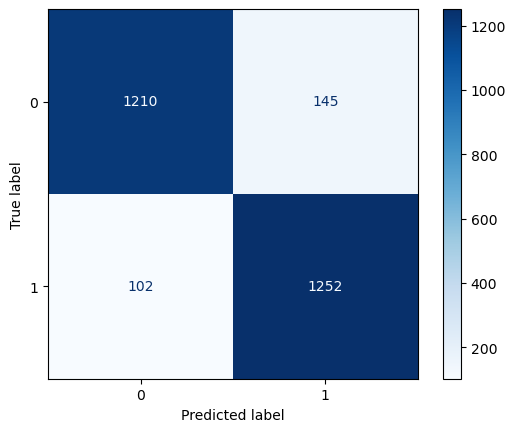

In [63]:
scores.append(evaluation(X_test, y_test, preds2, gs_2))

#### Model 3: CountVectorizer & KNeighborsClassifier

In [66]:
pipe_3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean=False)),
    ('knn', KNeighborsClassifier())
])

In [67]:
gs_3 = GridSearchCV(pipe_3, pipe_params, cv=5)
gs_3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2500, 5000],
                         'cvec__min_df': [3, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]]})

In [68]:
gs_3.score(X_train,y_train)

0.6980923076923077

In [69]:
gs_3.score(X_test,y_test)

0.593576965669989

In [26]:
gs_3.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2500,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [70]:
preds3 = gs_3.predict(X_test)

recall: 0.9187592319054653
precision: 0.556599552572707
f1 score: 0.693229311786013


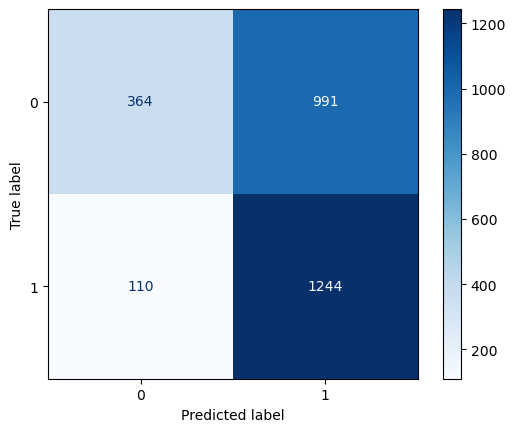

In [71]:
scores.append(evaluation(X_test, y_test, preds3, gs_3))

#### Model 4 : CountVectorizer & MultinomialNB

In [73]:
pipe_4 = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

In [74]:
gs_4 = GridSearchCV(pipe_4, pipe_params, cv=5)

In [83]:
gs_4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2500, 5000],
                         'cvec__min_df': [3, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]]})

In [84]:
pipe_4.score(X_train,y_train)

0.9171692307692307

In [85]:
pipe_4.score(X_test,y_test)

0.8589885566629752

In [86]:
preds4 = gs_4.predict(X_test)

recall: 0.9209748892171344
precision: 0.8541095890410959
f1 score: 0.8862828713574982


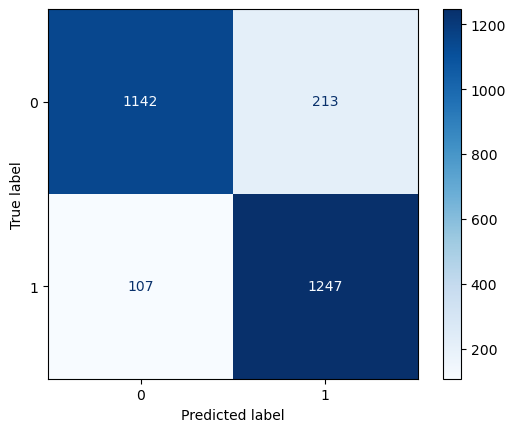

In [88]:
scores.append(evaluation(X_test, y_test, preds4, gs_4))

#### Model 5: TfidfVectorizer & LogisticRegression

In [89]:
pipe_5 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logr', LogisticRegression())
])

In [90]:
pipe_params_2= {
    'tvec__max_features' : [2500, 5000],
    'tvec__stop_words' : [None, 'english', nltk_stop],
    'tvec__ngram_range' : [(1, 1), (1, 2)],
    'logr__penalty' :['l1','l2'],
    'logr__solver' : ['liblinear'],
    'logr__max_iter' : [1000]
}

In [91]:
gs_5 = GridSearchCV(pipe_5,pipe_params_2,cv=5)
gs_5.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logr', LogisticRegression())]),
             param_grid={'logr__max_iter': [1000],
                         'logr__penalty': ['l1', 'l2'],
                         'logr__solver': ['liblinear'],
                         'tvec__max_features': [2500, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]]})

In [92]:
gs_5.score(X_train,y_train)

0.9352615384615385

In [93]:
gs_5.score(X_test,y_test)

0.9021779254337394

In [56]:
gs_5.best_params_

{'logr__max_iter': 1000,
 'logr__penalty': 'l2',
 'logr__solver': 'liblinear',
 'tvec__max_features': 5000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [94]:
preds5 = gs_5.predict(X_test)

recall: 0.9135893648449039
precision: 0.8931407942238268
f1 score: 0.9032493610806864


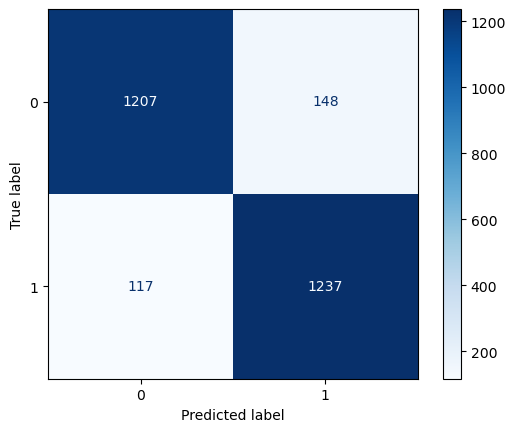

In [95]:
scores.append(evaluation(X_test, y_test, preds5, gs_5))

In [100]:
pd.DataFrame(scores, index=['model 1', 'model 2', 
             'model 3','model 3','model 4', 'model 5']) 

,recall,precision,f1_score
model 1,0.963072,0.827937,0.890406
model 2,0.924668,0.896206,0.910214
model 3,0.918759,0.556600,0.693229
model 3,0.918759,0.556600,0.693229
model 4,0.920975,0.854110,0.886283
model 5,0.913589,0.893141,0.903249
